In [51]:
import pandas as pd

# Load the dataset
file_path = '/content/dailystar_march_sept.csv'  # Path to your CSV file
df = pd.read_csv(file_path)

# Check for duplicate rows
duplicates = df[df.duplicated(subset=['Link'], keep=False)]  # 'keep=False' shows all duplicates

# Display the duplicate rows
print("Duplicate rows based on 'Title' and 'Date':")
print(duplicates)

# Number of duplicate rows
num_duplicates = len(duplicates)
print(f"Total number of duplicate rows: {num_duplicates}")

# If you want to remove duplicates and keep only the first occurrence:
df_cleaned = df.drop_duplicates(subset=['Link'], keep='first')

# Optionally, save the cleaned dataset
df_cleaned.to_csv('cleaned_news_data.csv', index=False)
print("Duplicates removed and cleaned data saved to 'cleaned_news_data.csv'.")


Duplicate rows based on 'Title' and 'Date':
Empty DataFrame
Columns: [Date, Title, Link, Details]
Index: []
Total number of duplicate rows: 0
Duplicates removed and cleaned data saved to 'cleaned_news_data.csv'.


In [52]:
!pip install nltk spacy beautifulsoup4 langdetect vaderSentiment textblob transformers seaborn matplotlib pandas huggingface_hub tensorflow



In [53]:

import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


           Date                                              Title  \
0  Sep 24, 2024  Touhid, top US diplomat Verma discuss peaceful...   
1  Sep 24, 2024        Ex-IGP Mamun on 4-day remand in murder case   
2  Sep 24, 2024  Touhid, Jaishankar meet at UNGA, discuss mutua...   
3  Sep 24, 2024  Army chief pledges support for Yunus' interim ...   
4  Sep 24, 2024                 Released top criminals at it again   

                                                Link  \
0  https://www.thedailystar.net/news/bangladesh/d...   
1  https://www.thedailystar.net/news/bangladesh/c...   
2  https://www.thedailystar.net/news/bangladesh/d...   
3  https://www.thedailystar.net/news/bangladesh/n...   
4  https://www.thedailystar.net/news/bangladesh/c...   

                                             Details  
0  Foreign Affairs Adviser Touhid Hossain met wit...  
1  A Dhaka court today placed former inspector ge...  
2   Foreign Affairs Adviser, HE Md. Touhid Hossai...  
3  Bangladesh's army c

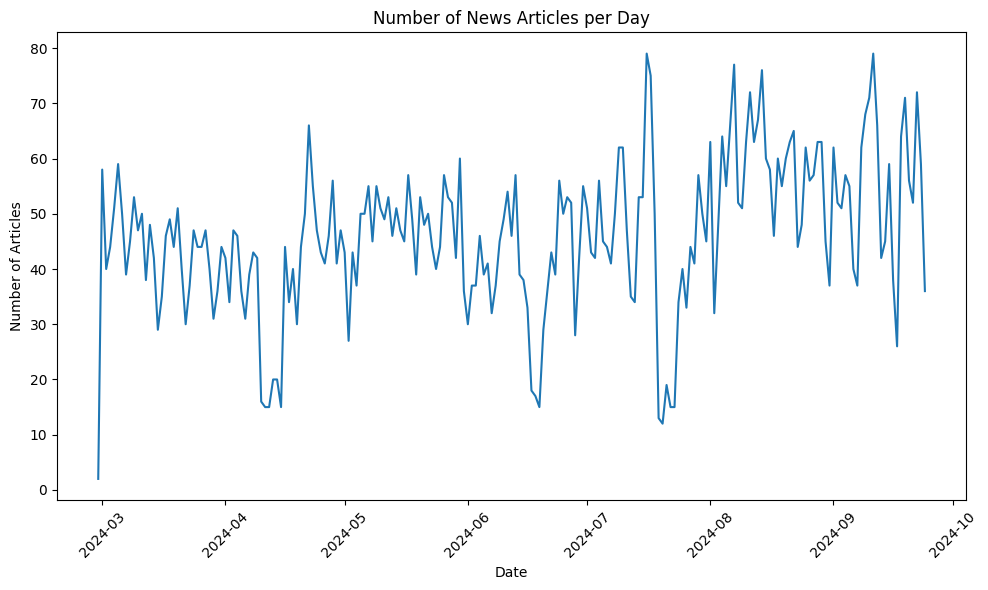

Most common words in news details: [('bangladesh', 14361), ('police', 12588), ('government', 10770), ('dhaka', 8597), ('minister', 6626), ('today', 6619), ('yesterday', 6221), ('country', 5961), ('students', 5927), ('tk', 5667)]


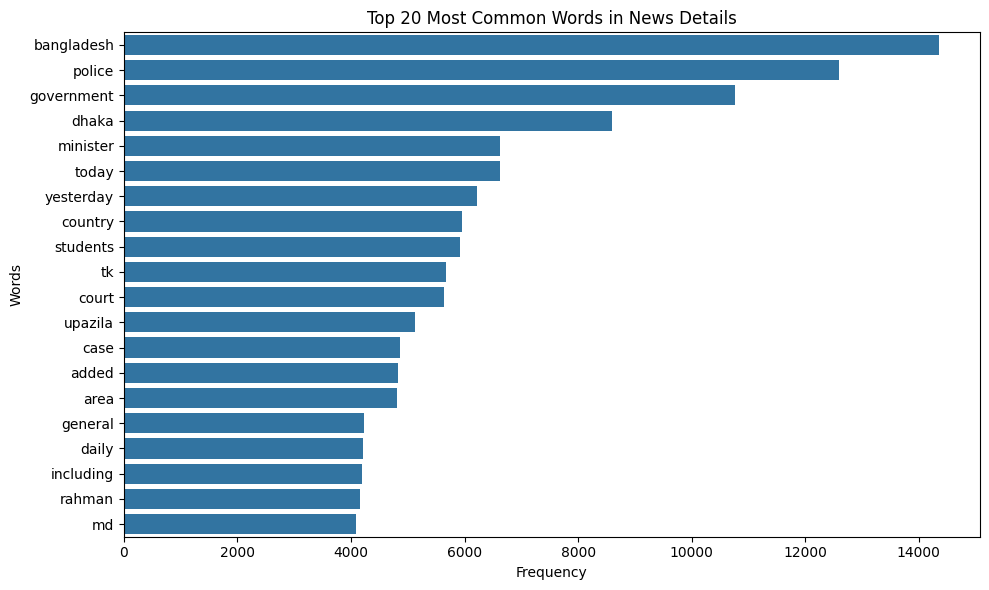

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
file_path = '/content/dailystar_march_sept.csv'  # Path to your CSV file
df = pd.read_csv(file_path)

# Show the first few rows
print(df.head())

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (optional, depending on your data)
df.dropna(inplace=True)

# Descriptive statistics
print("Total articles: ", len(df))
print("Date range: ", df['Date'].min(), " to ", df['Date'].max())
print("Top 5 most frequent titles:")
print(df['Title'].value_counts().head(5))

# Group by date and count articles
news_per_day = df.groupby(df['Date'].dt.date).size()

# Plot number of articles per day
plt.figure(figsize=(10, 6))
sns.lineplot(x=news_per_day.index, y=news_per_day.values)
plt.title('Number of News Articles per Day')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Word frequency analysis in the 'Details' column
stop_words = set(stopwords.words())  # You can add/remove stopwords specific to Bengali
df['tokenized_details'] = df['Details'].apply(word_tokenize)

# Flatten the list of tokens and filter stopwords
all_words = [word.lower() for article in df['tokenized_details'] for word in article if word.isalpha()]
filtered_words = [word for word in all_words if word not in stop_words]

# Count word frequency
word_freq = Counter(filtered_words)

# Display most common words
print("Most common words in news details:", word_freq.most_common(10))

# Plot word frequency
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 20 Most Common Words in News Details')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.tight_layout()
plt.show()


In [55]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
from bs4 import BeautifulSoup
from langdetect import detect
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
import re


# Download necessary data for nltk and spacy
nltk.download('stopwords')
nltk.download('punkt')
spacy.cli.download("en_core_web_sm")

# Load spaCy's English model
nlp = spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [56]:

df = pd.read_csv('/content/dailystar_march_sept.csv')

# Function to clean HTML tags and irrelevant content
def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Apply text cleaning to the 'Details' column
df['cleaned_details'] = df['Details'].apply(clean_text)

# Remove stop words and tokenize
stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text.lower())  # Lowercase and tokenize
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  # Remove stopwords
    return tokens

df['tokens'] = df['cleaned_details'].apply(tokenize_and_remove_stopwords)

# Lemmatization
def lemmatize_text(text):
    doc = nlp(" ".join(text))
    return [token.lemma_ for token in doc if token.lemma_.isalpha()]

df['lemmatized'] = df['tokens'].apply(lemmatize_text)


In [57]:
# Initialize VADER sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment from VADER
def get_vader_sentiment(text):
    sentiment_scores = vader_analyzer.polarity_scores(" ".join(text))
    return sentiment_scores

df['vader_sentiment'] = df['lemmatized'].apply(get_vader_sentiment)


In [58]:
# Function to get sentiment from TextBlob
def get_textblob_sentiment(text):
    blob = TextBlob(" ".join(text))
    return blob.sentiment

df['textblob_sentiment'] = df['lemmatized'].apply(get_textblob_sentiment)


In [59]:
print(df['textblob_sentiment'])

0         (0.11996047430830038, 0.28320158102766796)
1         (0.036111111111111115, 0.2305555555555555)
2                                  (-0.0625, 0.1125)
3        (0.015685483870967735, 0.36377240143369177)
4       (-0.017142857142857144, 0.37428571428571444)
                            ...                     
9615       (0.11204806687565308, 0.4513793103448276)
9616        (0.05991436100131753, 0.270125164690382)
9617    (-0.026774322169059016, 0.30139553429027116)
9618     (0.028666666666666674, 0.30133333333333334)
9619      (0.03333333333333333, 0.05000000000000001)
Name: textblob_sentiment, Length: 9620, dtype: object


In [60]:
from transformers import pipeline
nlp = pipeline("sentiment-analysis", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english",device=0)

def chunk_text(text, max_length=512):
    words = text.split()
    for i in range(0, len(words), max_length):
        yield ' '.join(words[i:i + max_length])

# Sentiment analysis function
def get_huggingface_sentiment(text):
    try:
        for chunk in chunk_text(text):
            result = nlp(chunk)
            print(result)
            return result
    except Exception as e:
        print(f"Error analyzing text: {text}, error: {e}")
        return ["Error"]

df['huggingface_sentiment'] = df['lemmatized'].apply(lambda x: get_huggingface_sentiment(" ".join(x)))



Output hidden; open in https://colab.research.google.com to view.

In [79]:
df.to_csv('df_saved.csv', index=False)
print("DataFrame saved to 'df_saved.csv'")

DataFrame saved to 'df_saved.csv'


In [62]:
df

,Date,Title,Link,Details,cleaned_details,tokens,lemmatized,vader_sentiment,textblob_sentiment,huggingface_sentiment
0,"Sep 24, 2024","Touhid, top US diplomat Verma discuss peaceful...",https://www.thedailystar.net/news/bangladesh/d...,Foreign Affairs Adviser Touhid Hossain met wit...,Foreign Affairs Adviser Touhid Hossain met wit...,"[foreign, affairs, adviser, touhid, hossain, m...","[foreign, affair, adviser, touhid, hossain, me...","{'neg': 0.061, 'neu': 0.791, 'pos': 0.148, 'co...","(0.11996047430830038, 0.28320158102766796)","[{'label': 'NEGATIVE', 'score': 0.982902526855..."
1,"Sep 24, 2024",Ex-IGP Mamun on 4-day remand in murder case,https://www.thedailystar.net/news/bangladesh/c...,A Dhaka court today placed former inspector ge...,A Dhaka court today placed former inspector ge...,"[dhaka, court, today, placed, former, inspecto...","[dhaka, court, today, place, former, inspector...","{'neg': 0.25, 'neu': 0.676, 'pos': 0.074, 'com...","(0.036111111111111115, 0.2305555555555555)","[{'label': 'NEGATIVE', 'score': 0.990781486034..."
2,"Sep 24, 2024","Touhid, Jaishankar meet at UNGA, discuss mutua...",https://www.thedailystar.net/news/bangladesh/d...,"Foreign Affairs Adviser, HE Md. Touhid Hossai...",Foreign Affairs Adviser HE Md Touhid Hossain ...,"[foreign, affairs, adviser, md, touhid, hossai...","[foreign, affair, adviser, md, touhid, hossain...","{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compou...","(-0.0625, 0.1125)","[{'label': 'NEGATIVE', 'score': 0.677519142627..."
3,"Sep 24, 2024",Army chief pledges support for Yunus' interim ...,https://www.thedailystar.net/news/bangladesh/n...,Bangladesh's army chief vowed to back the coun...,Bangladeshs army chief vowed to back the count...,"[bangladeshs, army, chief, vowed, back, countr...","[bangladeshs, army, chief, vow, back, countrys...","{'neg': 0.104, 'neu': 0.788, 'pos': 0.108, 'co...","(0.015685483870967735, 0.36377240143369177)",[Error]
4,"Sep 24, 2024",Released top criminals at it again,https://www.thedailystar.net/news/bangladesh/c...,"Nasir Biswas, a 26-year-old mason, was walking...",Nasir Biswas a yearold mason was walking close...,"[nasir, biswas, yearold, mason, walking, close...","[nasir, biswa, yearold, mason, walk, close, ma...","{'neg': 0.271, 'neu': 0.638, 'pos': 0.091, 'co...","(-0.017142857142857144, 0.37428571428571444)",[Error]
...,...,...,...,...,...,...,...,...,...,...
9615,"Mar 01, 2024",Apu’s medical study uncertain,https://www.thedailystar.net/news/bangladesh/n...,"Apu Das, who qualified for admission to MBBS c...",Apu Das who qualified for admission to MBBS co...,"[apu, das, qualified, admission, mbbs, course,...","[apu, das, qualified, admission, mbbs, course,...","{'neg': 0.103, 'neu': 0.765, 'pos': 0.131, 'co...","(0.11204806687565308, 0.4513793103448276)","[{'label': 'NEGATIVE', 'score': 0.978564620018..."
9616,"Mar 01, 2024",Malaysia to repatriate workers sans documents,https://www.thedailystar.net/nrb/migration/und...,Malaysia begins its Migration Repatriation Pro...,Malaysia begins its Migration Repatriation Pro...,"[malaysia, begins, migration, repatriation, pr...","[malaysia, begin, migration, repatriation, pro...","{'neg': 0.063, 'neu': 0.837, 'pos': 0.1, 'comp...","(0.05991436100131753, 0.270125164690382)","[{'label': 'NEGATIVE', 'score': 0.987774074077..."
9617,"Mar 01, 2024",New cabinet members likely to take oath today,https://www.thedailystar.net/news/bangladesh/n...,Prime Minister Sheikh Hasina is likely to stre...,Prime Minister Sheikh Hasina is likely to stre...,"[prime, minister, sheikh, hasina, likely, stre...","[prime, minister, sheikh, hasina, likely, stre...","{'neg': 0.0, 'neu': 0.959, 'pos': 0.041, 'comp...","(-0.026774322169059016, 0.30139553429027116)","[{'label': 'NEGATIVE', 'score': 0.974703907966..."
9618,"Feb 29, 2024",Country’s properties must be protected: HC,https://www.thedailystar.net/news/bangladesh/c...,The High Court today said the properties of th...,The High Court today said the properties of th...,"[high, co

In [63]:
# Define keywords for political entities
political_keywords = ['awami league', 'sheikh hasina', 'bangladesh nationalist party', 'bnp', 'khaleda zia','tarek zia','jamayet islami','jatiyo party','Democracy','Authoritarianism','Secularism','Nationalism','Regionalism','Bangabandhu Sheikh Mujibur Rahman','Khandaker Moshtaque Ahmed','Ziaur Rahman','1971 Liberation War',' 1975', '1990 Uprising', '2009 General Elections','2014 General Elections','2018 General Elections','2024 General Elections', 'Rohingya Refugee Crisis','River Erosion', 'Corruption', 'Climate Change','President','Prime Minister']

def detect_political_bias(text):
    text = " ".join(text)
    for keyword in political_keywords:
        if keyword in text.lower():
            return True
    return False

df['political_bias'] = df['lemmatized'].apply(detect_political_bias)




In [64]:
print(df['political_bias'])

0       False
1        True
2       False
3        True
4        True
        ...  
9615    False
9616    False
9617     True
9618     True
9619    False
Name: political_bias, Length: 9620, dtype: bool


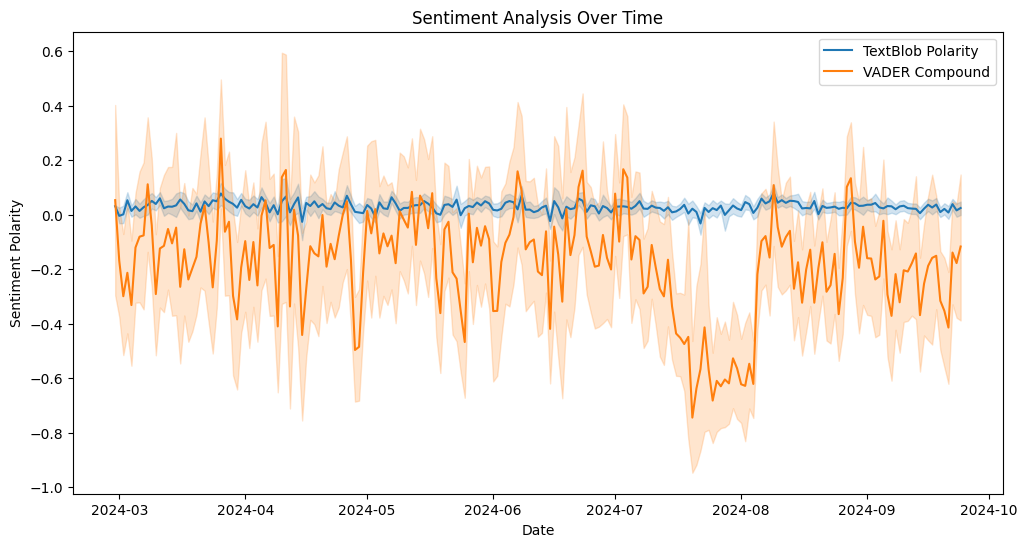

In [65]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

df['textblob_polarity'] = df['textblob_sentiment'].apply(lambda x: x.polarity)
df['vader_compound'] = df['vader_sentiment'].apply(lambda x: x['compound'])


# Plotting sentiment polarity over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='textblob_polarity', data=df, label='TextBlob Polarity')
sns.lineplot(x='Date', y='vader_compound', data=df, label='VADER Compound')
plt.title('Sentiment Analysis Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Polarity')
plt.legend()
plt.show()


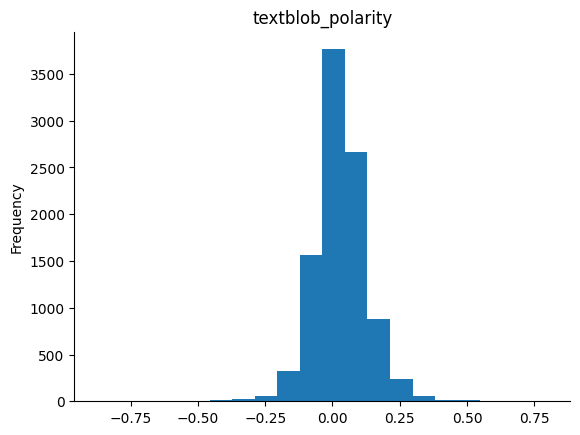

In [66]:
# @title textblob_polarity

from matplotlib import pyplot as plt
df['textblob_polarity'].plot(kind='hist', bins=20, title='textblob_polarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [72]:

df['huggingface_sentiment'] = df['huggingface_sentiment'].apply(lambda x: {'label': 'Neutral', 'score': 0.5} if isinstance(x, list) and 'Error' in x else x)


In [73]:
# prompt: find Neutral in # prompt: find nan in 'huggingface_sentiment' and replace with Neutral and mean score

# Find NaN values in 'huggingface_sentiment' and replace with 'Neutral' and the mean score
df['huggingface_sentiment']

,huggingface_sentiment
0,"[{'label': 'NEGATIVE', 'score': 0.982902526855..."
1,"[{'label': 'NEGATIVE', 'score': 0.990781486034..."
2,"[{'label': 'NEGATIVE', 'score': 0.677519142627..."
3,"{'label': 'Neutral', 'score': 0.5}"
4,"{'label': 'Neutral', 'score': 0.5}"
...,...
9615,"[{'label': 'NEGATIVE', 'score': 0.978564620018..."
9616,"[{'label': 'NEGATIVE', 'score': 0.987774074077..."
9617,"[{'label': 'NEGATIVE', 'score': 0.974703907966..."
9618,"[{'label': 'NEGATIVE', 'score': 0.981523096561..."


In [70]:
df.shape

(9620, 13)

Average TextBlob Polarity before 2024-08-05 00:00:00: 0.0286046155150405
Average VADER Compound before 2024-08-05 00:00:00: -0.17748918999404406
Average HuggingFace Compound before 2024-08-05 00:00:00: 0.032846715328467155
avg textblob after : 0.03201008439871822
avg_vader_after: -0.17919469696969698
avg_huggingface_after: 0.03203582500861178


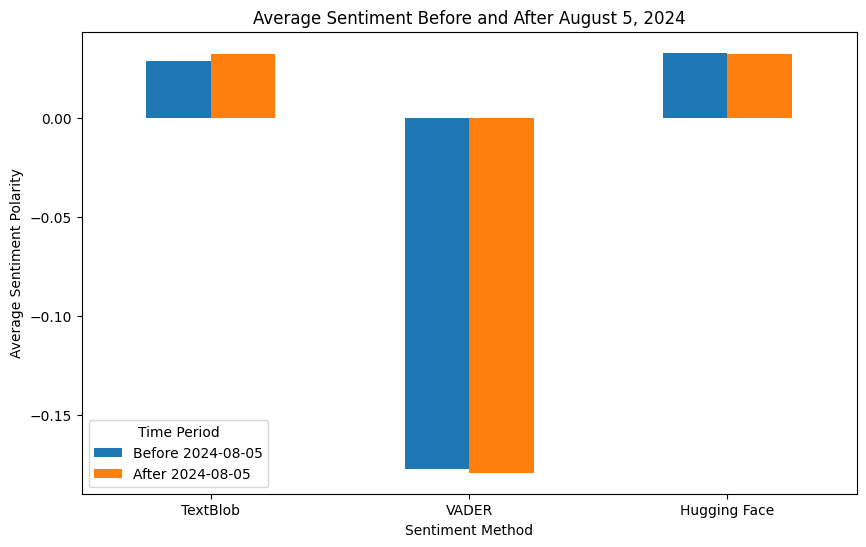

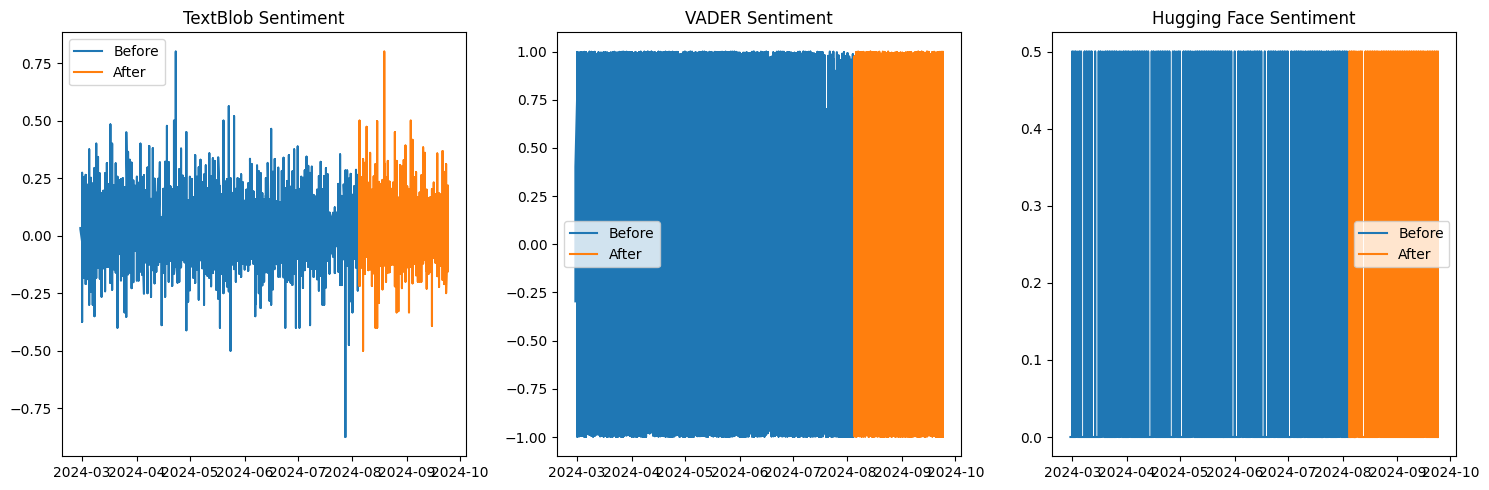

In [78]:


cutoff_date = datetime(2024, 8, 5)

df_before = df[df['Date'] < cutoff_date]
df_after = df[df['Date'] >= cutoff_date]


# Calculate average sentiment polarity for both groups using different sentiment methods
avg_textblob_before = df_before['textblob_polarity'].mean()
print(f'Average TextBlob Polarity before {cutoff_date}: {avg_textblob_before}')
avg_vader_before = df_before['vader_compound'].mean()
print(f'Average VADER Compound before {cutoff_date}: {avg_vader_before}')
avg_huggingface_before = df_before['huggingface_sentiment'].apply(lambda x: x['score'] if isinstance(x, dict) else 0).mean()
print(f'Average HuggingFace Compound before {cutoff_date}: {avg_huggingface_before}')



avg_textblob_after = df_after['textblob_polarity'].mean()
avg_vader_after = df_after['vader_compound'].mean()
avg_huggingface_after = df_after['huggingface_sentiment'].apply(lambda x: x['score'] if isinstance(x, dict) else 0).mean()
print(f'avg textblob after : {avg_textblob_after}')
print(f'avg_vader_after: {avg_vader_after}')
print(f'avg_huggingface_after: {avg_huggingface_after}')


sentiment_comparison = pd.DataFrame({
    'Sentiment Method': ['TextBlob', 'VADER', 'Hugging Face'],
    'Before 2024-08-05': [avg_textblob_before, avg_vader_before, avg_huggingface_before],
    'After 2024-08-05': [avg_textblob_after, avg_vader_after, avg_huggingface_after]
})


# Plot the sentiment comparison with different methods and time periods
sentiment_comparison.plot(x='Sentiment Method', kind='bar', figsize=(10, 6))
plt.title('Average Sentiment Before and After August 5, 2024')
plt.ylabel('Average Sentiment Polarity')
plt.xlabel('Sentiment Method')
plt.legend(title='Time Period')
plt.xticks(rotation=0)
plt.show()



# Plotting separate graphs for each sentiment method
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(df_before['Date'], df_before['textblob_polarity'], label='Before')
plt.plot(df_after['Date'], df_after['textblob_polarity'], label='After')
plt.title('TextBlob Sentiment')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(df_before['Date'], df_before['vader_compound'], label='Before')
plt.plot(df_after['Date'], df_after['vader_compound'], label='After')
plt.title('VADER Sentiment')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(df_before['Date'], df_before['huggingface_sentiment'].apply(lambda x: x['score'] if isinstance(x, dict) else 0), label='Before')
plt.plot(df_after['Date'], df_after['huggingface_sentiment'].apply(lambda x: x['score'] if isinstance(x, dict) else 0), label='After')
plt.title('Hugging Face Sentiment')
plt.legend()

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>